## Overview:

In this project we were tasked with predicting what a house will be worth in King County Seatle Washington. I first familiarized myself with the Data, removing any outliers. Next, I changed the continous predictors into catagorical types. After that I manipulated the data to better fit my model, and checked the columns for any multicolinierity. After selecting the best predictors for this model I achieved an RMSE of 162129.90. The Final predictions can be found on housing_preds_Kelvin_Arellano.csv

## Business Questions

The main questions I asked myself to build this model were:
    1. What effect does sqft of the lot have on price?
    2. What effect does renovation have on price?
    3. What effect does the month sold have on price?

## Get to Know Your Data

In [78]:
#importing initial packages
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle 

In [79]:
df = pd.read_csv('kc_house_data_train.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


## EDA (Exploritory Data Analysis)

In [80]:
#checking the shape of the dataframe
df.shape

(17290, 22)

In [81]:
#checking the datatypes of each column
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [82]:
#check for null values
df.isna().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [83]:
#getting general info
df.info

<bound method DataFrame.info of        Unnamed: 0          id             date      price  bedrooms  \
0               0  2591820310  20141006T000000   365000.0         4   
1               1  7974200820  20140821T000000   865000.0         5   
2               2  7701450110  20140815T000000  1038000.0         4   
3               3  9522300010  20150331T000000  1490000.0         3   
4               4  9510861140  20140714T000000   711000.0         3   
...           ...         ...              ...        ...       ...   
17285       17285   627300195  20150303T000000   750000.0         5   
17286       17286  8819900270  20140520T000000   440000.0         2   
17287       17287  3816300095  20140514T000000   310000.0         3   
17288       17288   122069107  20141204T000000   427500.0         3   
17289       17289  6703100135  20150116T000000   348000.0         3   

       bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  \
0           2.25         2070      

In [84]:
#dropping first column since it serves no pupose
del df['Unnamed: 0']

In [85]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [86]:
#setting aside date, id and price since they hold no predictive value right now.
df_new = df.iloc[:,1:]

In [87]:
df_new.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


### Visualizing Data

I created histograms to cheack the distribution and possible correlations. Several aspects of the data is right skewed. I also want to take a closer look at waterfront, and yr_renovated. I also want to see a plot for bedrooms

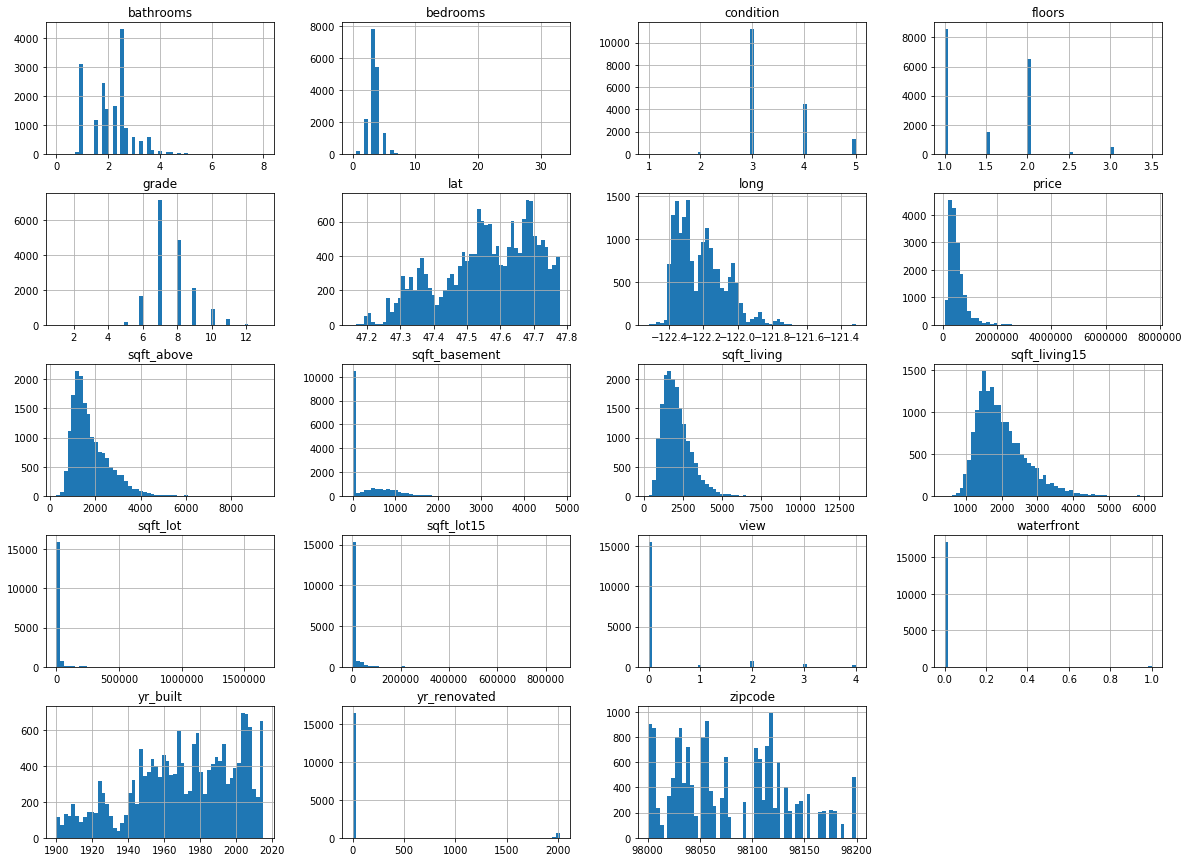

In [88]:
df_new.hist(bins=55, figsize=(20,15))
plt.show()

It looks like water front is treated as a catagorical type and that there is a crazy outlier in bedrooms. There also seems to be a huge disparity in yr_renovated, this could be a good start for possible features.

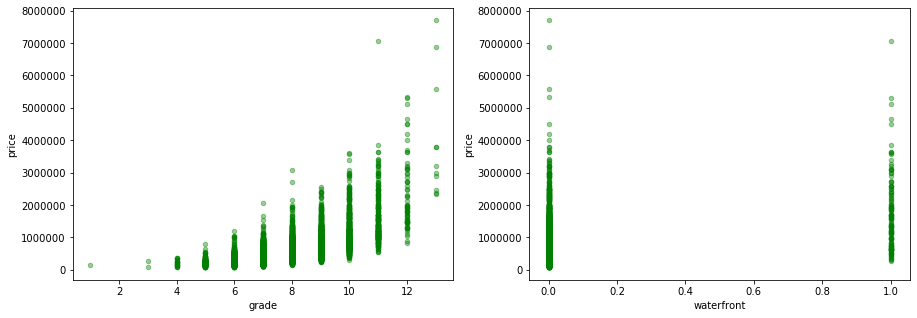

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for xcol, ax in zip(['grade', 'waterfront'], axes):
    df_new.plot(kind='scatter',x=xcol, y='price',ax=ax,alpha=0.4,color='g')

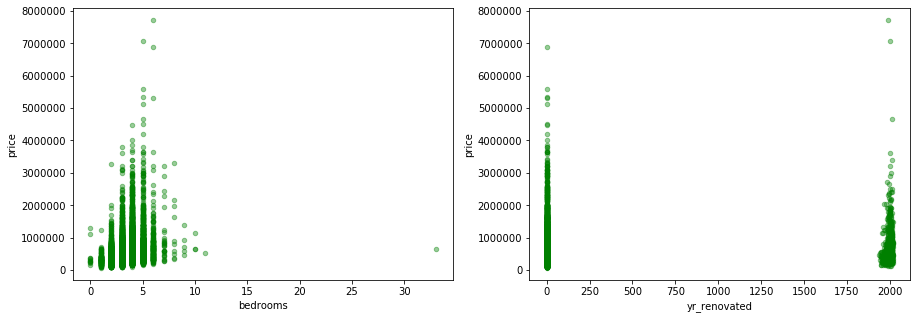

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for xcol, ax in zip(['bedrooms', 'yr_renovated'], axes):
    df_new.plot(kind='scatter',x=xcol, y='price',ax=ax,alpha=0.4,color='g')

In [91]:
# changing the bedroom column 
df_new.loc[df.bedrooms > 20, 'bedrooms'] = df.bedrooms.median()

### Checking for significant columns

In [92]:
# Anova of all catagorical columns
formula = 'price ~ C(view) + C(grade) + C(floors) +C(waterfront)+ C(bedrooms) + C(bathrooms) + C(condition) + yr_built + yr_renovated + zipcode + sqft_living + sqft_lot + sqft_basement + sqft_living15 + sqft_lot15'
lm = ols(formula, df_new).fit()
table = sm.stats.anova_lm(lm, type=1)
print(table)

                    df        sum_sq       mean_sq            F         PR(>F)
C(view)            4.0  4.064221e+14  1.016055e+14  2447.216686   0.000000e+00
C(grade)          11.0  9.880174e+14  8.981976e+13  2163.351024   0.000000e+00
C(floors)          5.0  2.354042e+13  4.708084e+12   113.396415  2.522202e-118
C(waterfront)      1.0  2.390029e+13  2.390029e+13   575.649747  3.731328e-125
C(bedrooms)       11.0  2.830647e+13  2.573316e+12    61.979517  2.624849e-136
C(bathrooms)      29.0  6.698729e+13  2.309906e+12    55.635180  2.969316e-307
C(condition)       4.0  2.286558e+13  5.716394e+12   137.682036  5.148827e-116
yr_built           1.0  6.911583e+13  6.911583e+13  1664.687127   0.000000e+00
yr_renovated       1.0  1.157083e+12  1.157083e+12    27.868892   1.313959e-07
zipcode            1.0  7.847060e+11  7.847060e+11    18.900012   1.385422e-05
sqft_living        1.0  5.275867e+13  5.275867e+13  1270.717315  1.382652e-268
sqft_lot           1.0  2.253192e+12  2.253192e+12  

The f-statistic represents the variation between each sample, which are the months in this case. Variances measure the dispersion of the data points around the mean. The higher the f-value, the farther that indivudal data points tend to fall from the mean.

Because the p-value is way below 0.5, we can say that they all have a significant effect on price

### Checking for multicoliniarity

creating a table showing the correlations between columns

In [93]:
df_new.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.313775,0.524335,0.703540,0.086803,0.256985,0.275779,0.395485,0.036099,0.666215,0.607760,0.323312,0.056450,0.117770,-0.048958,0.302394,0.019327,0.585567,0.081423
bedrooms,0.313775,1.000000,0.524033,0.588536,0.030674,0.179908,-0.008668,0.082724,0.021376,0.366405,0.488420,0.307873,0.159936,0.014489,-0.152831,-0.003991,0.129593,0.401073,0.028038
bathrooms,0.524335,0.524033,1.000000,0.755270,0.085470,0.497967,0.065848,0.188817,-0.122976,0.664191,0.686853,0.282700,0.507761,0.048140,-0.201527,0.023074,0.221308,0.568080,0.086499
sqft_living,0.703540,0.588536,0.755270,1.000000,0.166810,0.357169,0.109738,0.283336,-0.061530,0.762929,0.876696,0.435529,0.319397,0.051448,-0.195893,0.052646,0.234453,0.755066,0.179570
sqft_lot,0.086803,0.030674,0.085470,0.166810,1.000000,-0.002205,0.015356,0.073058,-0.013715,0.110320,0.180755,0.008065,0.054228,0.004520,-0.126590,-0.082029,0.226190,0.136959,0.701875
floors,0.256985,0.179908,0.497967,0.357169,-0.002205,1.000000,0.025132,0.025883,-0.259230,0.458984,0.528509,-0.247481,0.483657,0.005985,-0.060560,0.048227,0.128795,0.283933,-0.008170
waterfront,0.275779,-0.008668,0.065848,0.109738,0.015356,0.025132,1.000000,0.407565,0.009608,0.092234,0.077162,0.083433,-0.021981,0.094268,0.034282,-0.013331,-0.042728,0.091090,0.026895
view,0.395485,0.082724,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000,0.045060,0.249554,0.164747,0.279939,-0.049593,0.091291,0.089475,0.003820,-0.077572,0.279999,0.073185
condition,0.036099,0.021376,-0.122976,-0.061530,-0.013715,-0.259230,0.009608,0.045060,1.000000,-0.142066,-0.157466,0.166923,-0.358921,-0.060969,0.007068,-0.009927,-0.109200,-0.094307,-0.007125
grade,0.666215,0.366405,0.664191,0.762929,0.110320,0.458984,0.092234,0.249554,-0.142066,1.000000,0.758247,0.165003,0.448003,0.007988,-0.184946,0.116196,0.198369,0.715745,0.116062


creating a heatmap to better show correlations

Text(0.5, 1, 'Model Correlation Matrix')

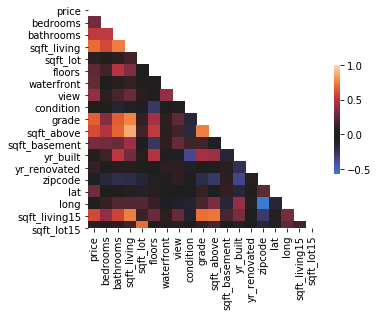

In [94]:
mask = np.zeros_like(df_new.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_new.corr(), mask = mask,center=0,vmax=1, square=True,cbar_kws={"shrink": .5});
ax.set_title('Model Correlation Matrix')

In [100]:
#create a dataframe of correlation coefficiant pairs with a coefficiant higher then .75
df_pairs=df_new.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_pairs['pairs'] = list(zip(df_pairs.level_0, df_pairs.level_1))
df_pairs.set_index(['pairs'], inplace = True)
df_pairs.drop(columns=['level_1', 'level_0'], inplace = True)
df_pairs.columns = ['cc']
df_pairs.drop_duplicates(inplace=True)

In [102]:
df_pairs[(df_pairs.cc>.75) & (df_pairs.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876696
"(grade, sqft_living)",0.762929
"(sqft_above, grade)",0.758247
"(bathrooms, sqft_living)",0.755270
"(sqft_living15, sqft_living)",0.755066


### Dropping columns with high multicoliniarity

In [106]:
#create new dataframe without high correlation pairs
pair_drop = df_new.drop(['grade','sqft_above','bathrooms','sqft_living15'], axis=1,)
pair_drop.head()

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
0,20141006T000000,365000.0,4.0,2070,8893,2.0,0,0,4,0,1986,0,98058,47.4388,-122.162,7700
1,20140821T000000,865000.0,5.0,2900,6730,1.0,0,0,5,1070,1977,0,98115,47.6784,-122.285,6283
2,20140815T000000,1038000.0,4.0,3770,10893,2.0,0,2,3,0,1997,0,98006,47.5646,-122.129,9685
3,20150331T000000,1490000.0,3.0,4560,14608,2.0,0,2,3,0,1990,0,98034,47.6995,-122.228,14226
4,20140714T000000,711000.0,3.0,2550,5376,2.0,0,0,3,0,2004,0,98052,47.6647,-122.083,4050


### changing the date and checking its effect

In [107]:
# cleaning the dates column, so that it's only the date numbers
pair_drop["date"] = pair_drop["date"].str.replace('T000000', '')

# make new column called month_sold with only the months
pair_drop['month_sold'] = pair_drop['date'].str[4:6]

# removing 0s only if they are at the begnining of single digit months
pair_drop['month_sold'] = pair_drop['month_sold'].str.replace('01', '1').replace('02', '2').replace('03', '3').replace('04', '4').replace('05', '5').replace('06', '6').replace('07', '7').replace('08', '8').replace('09', '9')

# converting new column 'month_sold' to int so we can graph it
pair_drop['month_sold'] = pair_drop['month_sold'].astype(int)

[Text(0, 0, 'Jan'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sept'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec')]

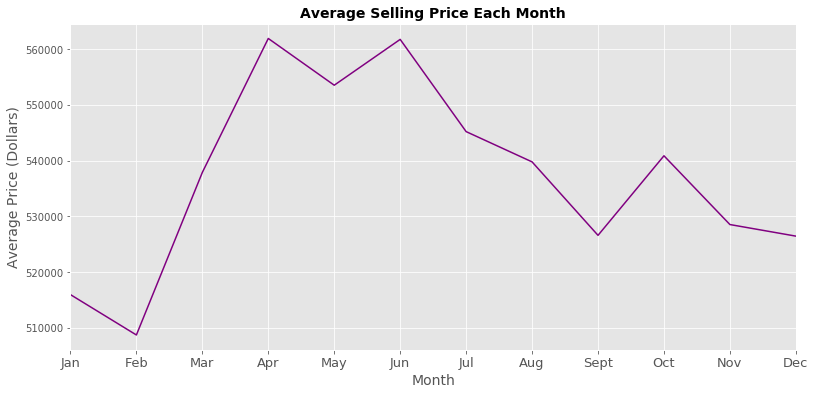

In [113]:
# creating a graph of average price per month to visualize if there's a trend

# creating a graph of average price per month to visualize if there's a trend

pair_drop.sort_values(by='month_sold', ascending=True)
months = sorted(pair_drop['month_sold'].unique())

avg_price = pair_drop.groupby('month_sold')['price'].mean()

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(13,6))
ax.plot(months, avg_price, color='purple')

# setting title and axis labels
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Average Price (Dollars)', fontsize=14)
ax.set_title('Average Selling Price Each Month', fontsize=14, weight='bold')

# setting month labels
ax.set_xlim(1, 12)
ax.set_xticks((1,2,3,4,5,6,7,8,9,10,11,12))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], fontsize=13)

# this graph shows the average price for each month for visualization purposes
# but if i use this feature in the model, we wouldn't find the average each month. just keep it as is to account for each individual house

### creating renovation column

In [120]:
#Create a new column of houses renovated after 2000 hava value of 1 and housed not renovated or renovated before 2000
#have a value of 0
pair_drop['renovated_after_2000'] = np.where(pair_drop['yr_renovated']>= 2000, 1,0)
pair_drop.renovated_after_2000.value_counts()

0    16922
1      368
Name: renovated_after_2000, dtype: int64

In [124]:
#drop old yr_renovated column
pair_drop = pair_drop.drop(['yr_renovated'],axis=1)

In [125]:
pair_drop.head()

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,zipcode,lat,long,sqft_lot15,month_sold,renovated_after_2000
0,20141006,365000.0,4.0,2070,8893,2.0,0,0,4,0,1986,98058,47.4388,-122.162,7700,10,0
1,20140821,865000.0,5.0,2900,6730,1.0,0,0,5,1070,1977,98115,47.6784,-122.285,6283,8,0
2,20140815,1038000.0,4.0,3770,10893,2.0,0,2,3,0,1997,98006,47.5646,-122.129,9685,8,0
3,20150331,1490000.0,3.0,4560,14608,2.0,0,2,3,0,1990,98034,47.6995,-122.228,14226,3,0
4,20140714,711000.0,3.0,2550,5376,2.0,0,0,3,0,2004,98052,47.6647,-122.083,4050,7,0


### creating dummy variables 

My next step before my first model was to create dummy variables for all of my catagorical data. I created dummies for the month sold, waterfront, floors, view, condition, zipcode, bedrooms, yr_built and yr_renovated. Createing these dummy variables creates new columns for each catagories with a value of 0 or 1. This helps the regression equations represent the multiple groups of the catagory. I also used Standard Scaler to scale the continuous variables values. This placed all of the values of my dataframe between 0 and 1.

In [126]:
#use pd.get_dummies to create dummy variables for catagorical data
month_sold_dummies = pd.get_dummies(pair_drop['month_sold'],prefix='month',drop_first=True)
water_dummies = pd.get_dummies(pair_drop['waterfront'], prefix='waterfront',drop_first=True)
floors_dummies = pd.get_dummies(pair_drop['floors'], prefix='floors',drop_first=True)
view_dummies = pd.get_dummies(pair_drop['view'], prefix='view',drop_first=True)
cond_dummies = pd.get_dummies(pair_drop['condition'],prefix='cond',drop_first=True)
zip_dummies = pd.get_dummies(pair_drop['zipcode'],prefix='zip',drop_first=True)
bed_dummies = pd.get_dummies(pair_drop['bedrooms'],prefix='bed',drop_first=True)
yr_built_dummies = pd.get_dummies(pair_drop['yr_built'],prefix='yrbuilt',drop_first=True)
renovated_dummies = pd.get_dummies(pair_drop['renovated_after_2000'],prefix='renovated',drop_first=True)
#dummie dataframe
#combine all the new dummy columns into one dataframe
dummie_data = pd.concat([month_sold_dummies, water_dummies,floors_dummies,view_dummies,cond_dummies,bed_dummies,zip_dummies,yr_built_dummies,renovated_dummies],axis=1)
dummie_data.head(1)

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,waterfront_1,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_1,view_2,view_3,view_4,cond_2,cond_3,cond_4,cond_5,bed_1.0,bed_2.0,bed_3.0,bed_4.0,bed_5.0,bed_6.0,bed_7.0,bed_8.0,bed_9.0,bed_10.0,bed_11.0,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,yrbuilt_1901,yrbuilt_1902,yrbuilt_1903,yrbuilt_1904,yrbuilt_1905,yrbuilt_1906,yrbuilt_1907,yrbuilt_1908,yrbuilt_1909,yrbuilt_1910,yrbuilt_1911,yrbuilt_1912,yrbuilt_1913,yrbuilt_1914,yrbuilt_1915,yrbuilt_1916,yrbuilt_1917,yrbuilt_1918,yrbuilt_1919,yrbuilt_1920,yrbuilt_1921,yrbuilt_1922,yrbuilt_1923,yrbuilt_1924,yrbuilt_1925,yrbuilt_1926,yrbuilt_1927,yrbuilt_1928,yrbuilt_1929,yrbuilt_1930,yrbuilt_1931,yrbuilt_1932,yrbuilt_1933,yrbuilt_1934,yrbuilt_1935,yrbuilt_1936,yrbuilt_1937,yrbuilt_1938,yrbuilt_1939,yrbuilt_1940,yrbuilt_1941,yrbuilt_1942,yrbuilt_1943,yrbuilt_1944,yrbuilt_1945,yrbuilt_1946,yrbuilt_1947,yrbuilt_1948,yrbuilt_1949,yrbuilt_1950,yrbuilt_1951,yrbuilt_1952,yrbuilt_1953,yrbuilt_1954,yrbuilt_1955,yrbuilt_1956,yrbuilt_1957,yrbuilt_1958,yrbuilt_1959,yrbuilt_1960,yrbuilt_1961,yrbuilt_1962,yrbuilt_1963,yrbuilt_1964,yrbuilt_1965,yrbuilt_1966,yrbuilt_1967,yrbuilt_1968,yrbuilt_1969,yrbuilt_1970,yrbuilt_1971,yrbuilt_1972,yrbuilt_1973,yrbuilt_1974,yrbuilt_1975,yrbuilt_1976,yrbuilt_1977,yrbuilt_1978,yrbuilt_1979,yrbuilt_1980,yrbuilt_1981,yrbuilt_1982,yrbuilt_1983,yrbuilt_1984,yrbuilt_1985,yrbuilt_1986,yrbuilt_1987,yrbuilt_1988,yrbuilt_1989,yrbuilt_1990,yrbuilt_1991,yrbuilt_1992,yrbuilt_1993,yrbuilt_1994,yrbuilt_1995,yrbuilt_1996,yrbuilt_1997,yrbuilt_1998,yrbuilt_1999,yrbuilt_2000,yrbuilt_2001,yrbuilt_2002,yrbuilt_2003,yrbuilt_2004,yrbuilt_2005,yrbuilt_2006,yrbuilt_2007,yrbuilt_2008,yrbuilt_2009,yrbuilt_2010,yrbuilt_2011,yrbuilt_2012,yrbuilt_2013,yrbuilt_2014,yrbuilt_2015,renovated_1
0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [127]:
#drop catagorical predictor columns
clean_drop = pair_drop.drop(['bedrooms','floors','waterfront','view','condition','yr_built','zipcode','date'],axis=1)
#scaled the values of continous predictors
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(clean_drop[['sqft_living','sqft_basement','lat',
                                                                  'long']]),
                        columns=['sqft_living','sqft_basement','lat','long'])

In [155]:

#create a new dataframe with the scaled predictors, dummies and target variable
ols_1 = pd.concat([clean_drop_train['price'],scaled_df, dummie_data], axis=1)
#renamed columns of some floor dummies to avoid syntax error
ols_1.rename(columns={'floors_3.0':'floors_3'}, inplace=True)
ols_1.rename(columns={'floors_3.5':'floors_3_5'}, inplace=True)
ols_1.rename(columns={'floors_1.5':'floors_1_5'}, inplace=True)
ols_1.rename(columns={'floors_2.0':'floors_2'}, inplace=True)
ols_1.rename(columns={'floors_2.5':'floors_2_5'}, inplace=True)
ols_1.rename(columns={'bed_1.0':'bed_1'}, inplace=True)
ols_1.rename(columns={'bed_2.0':'bed_2'}, inplace=True)
ols_1.rename(columns={'bed_3.0':'bed_3'}, inplace=True)
ols_1.rename(columns={'bed_4.0':'bed_4'}, inplace=True)
ols_1.rename(columns={'bed_5.0':'bed_5'}, inplace=True)
ols_1.rename(columns={'bed_6.0':'bed_6'}, inplace=True)
ols_1.rename(columns={'bed_7.0':'bed_7'}, inplace=True)
ols_1.rename(columns={'bed_8.0':'bed_8'}, inplace=True)
ols_1.rename(columns={'bed_9.0':'bed_9'}, inplace=True)
ols_1.rename(columns={'bed_10.0':'bed_10'}, inplace=True)
ols_1.rename(columns={'bed_11.0':'bed_11'}, inplace=True)

ols_1.head()

,price,sqft_living,sqft_basement,lat,long,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,waterfront_1,floors_1_5,floors_2,floors_2_5,floors_3,floors_3_5,view_1,view_2,view_3,view_4,cond_2,cond_3,cond_4,cond_5,bed_1,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,yrbuilt_1901,yrbuilt_1902,yrbuilt_1903,yrbuilt_1904,yrbuilt_1905,yrbuilt_1906,yrbuilt_1907,yrbuilt_1908,yrbuilt_1909,yrbuilt_1910,yrbuilt_1911,yrbuilt_1912,yrbuilt_1913,yrbuilt_1914,yrbuilt_1915,yrbuilt_1916,yrbuilt_1917,yrbuilt_1918,yrbuilt_1919,yrbuilt_1920,yrbuilt_1921,yrbuilt_1922,yrbuilt_1923,yrbuilt_1924,yrbuilt_1925,yrbuilt_1926,yrbuilt_1927,yrbuilt_1928,yrbuilt_1929,yrbuilt_1930,yrbuilt_1931,yrbuilt_1932,yrbuilt_1933,yrbuilt_1934,yrbuilt_1935,yrbuilt_1936,yrbuilt_1937,yrbuilt_1938,yrbuilt_1939,yrbuilt_1940,yrbuilt_1941,yrbuilt_1942,yrbuilt_1943,yrbuilt_1944,yrbuilt_1945,yrbuilt_1946,yrbuilt_1947,yrbuilt_1948,yrbuilt_1949,yrbuilt_1950,yrbuilt_1951,yrbuilt_1952,yrbuilt_1953,yrbuilt_1954,yrbuilt_1955,yrbuilt_1956,yrbuilt_1957,yrbuilt_1958,yrbuilt_1959,yrbuilt_1960,yrbuilt_1961,yrbuilt_1962,yrbuilt_1963,yrbuilt_1964,yrbuilt_1965,yrbuilt_1966,yrbuilt_1967,yrbuilt_1968,yrbuilt_1969,yrbuilt_1970,yrbuilt_1971,yrbuilt_1972,yrbuilt_1973,yrbuilt_1974,yrbuilt_1975,yrbuilt_1976,yrbuilt_1977,yrbuilt_1978,yrbuilt_1979,yrbuilt_1980,yrbuilt_1981,yrbuilt_1982,yrbuilt_1983,yrbuilt_1984,yrbuilt_1985,yrbuilt_1986,yrbuilt_1987,yrbuilt_1988,yrbuilt_1989,yrbuilt_1990,yrbuilt_1991,yrbuilt_1992,yrbuilt_1993,yrbuilt_1994,yrbuilt_1995,yrbuilt_1996,yrbuilt_1997,yrbuilt_1998,yrbuilt_1999,yrbuilt_2000,yrbuilt_2001,yrbuilt_2002,yrbuilt_2003,yrbuilt_2004,yrbuilt_2005,yrbuilt_2006,yrbuilt_2007,yrbuilt_2008,yrbuilt_2009,yrbuilt_2010,yrbuilt_2011,yrbuilt_2012,yrbuilt_2013,yrbuilt_2014,yrbuilt_2015,renovated_1
0,365000.0,-0.012462,-0.659293,-0.876090,0.371013,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,865000.0,0.889720,1.755299,0.855021,-0.502235,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1038000.0,1.835381,-0.659293,0.032816,0.605300,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1490000

In [156]:
#select target variable 
outcome = 'price'
#seperate target from the predictors
predictors = ols_1.drop('price',axis=1)
#place a + between each predictor column name
pred_sum = '+'.join(predictors.columns)
#place a ~ between the target and the predictor sum and save as variable formula
formula = outcome + '~' + pred_sum

In [157]:
#ols model using the new dataframe
model_1 = ols(formula=formula, data=ols_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     310.1
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        07:01:35   Log-Likelihood:            -2.3230e+05
No. Observations:               17290   AIC:                         4.651e+05
Df Residuals:                   17064   BIC:                         4.668e+05
Df Model:                         225                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.662e+05   6.54e+04      5.600      0.000    2.38e+05    4.94e+05
sqft_living    2.617e+05   2312.698    113.146      0.000    2.57e+05    2.66e+05
sqft_basement -4.839e+04   1863.243    -25.972      0.000    -5.2e+04   -4.47e+04
lat             3.81e+04   1.02e+04      3.736      0.000    1.81e+04    5.81e+04
long          -2.495e+04   7371.756     -3.384      0.001   -3.94e+04   -1.05e+04
month_2        -857.3662   7995.114     -0.107      0.915   -1.65e+04    1.48e+04
month_3        2.238e+04   7361.304      3.040      0.002    7949.034    3.68e+04
month_4        3.162e+04   7146.592      4.424      0.000    1.76e+04    4.56e+04
month_5        1215.6217   7081.992      0.172      0.864   -1.27e+04    1.51e+04
month_6        1214.6246   7183.765      0.169      0.866   -1.29e+04    1.53e+04
month_7       -8062.6428   7181.469     -1.123      0.262   -2.21e+04    6013.776
month_8       -3191.6782   7323.725     -0.436      0.663   -1.75e+04    1.12e+04
month_9       -1.434e+04   7464.742     -1.921      0.055    -2.9e+04     295.178
month_10      -5657.1833   7373.729     -0.767      0.443   -2.01e+04    8796.086
month_11      -1.122e+04   7730.883     -1.451      0.147   -2.64e+04    3935.140
month_12      -9479.3627   7717.605     -1.228      0.219   -2.46e+04    5647.939
waterfront_1   5.706e+05   1.81e+04     31.517      0.000    5.35e+05    6.06e+05
floors_1_5    -4.678e+04   5472.138     -8.549      0.000   -5.75e+04   -3.61e+04
floors_2      -6.269e+04   4577.515    -13.696      0.000   -7.17e+04   -5.37e+04
floors_2_5     4.745e+04   1.52e+04      3.124      0.002    1.77e+04    7.72e+04
floors_3      -9.791e+04   9876.331     -9.914      0.000   -1.17e+05   -7.86e+04
floors_3_5     1605.9429   6.44e+04      0.025      0.980   -1.25e+05    1.28e+05
view_1         8.521e+04   1.06e+04      8.021      0.000    6.44e+04    1.06e+05
view_2         8.918e+04   6403.867     13.926      0.000    7.66e+04    1.02e+05
view_3         1.741e+05   8767.268     19.856      0.000    1.57e+05    1.91e+05
view_4         3.737e+05   1.32e+04     28.361      0.000    3.48e+05       4e+05
cond_2         1.041e+05   3.72e+04      2.797      0.005    3.12e+04    1.77e+05
cond_3         9.801e+04   3.45e+04      2.837      0.005    3.03e+04    1.66e+05
cond_4         1.223e+05   3.46e+04      3.537      0.000    5.45e+04     1.9e+05
cond_5         1.695e+05   3.48e+04      4.876      0.000    1.01e+05    2.38e+05
bed_1            81.6496   5.06e+04      0.002      0.999   -9.92e+04    9.93e+04
bed_2         -2.049e+04    4.9e+04     -0.418      0.676   -1.16e+05    7.55e+04
bed_3         -4.397e+04   4.89e+04     -0.900      0.368    -1.4e+05    5.18e+04
bed_4         -8.409e+04   4.89e+04     -1.719      0.086    -1.8e+05    1.18e+04
bed_5         -1.049e+05   4.91e+04     -2.135   

In [158]:
#Train test split train data
y = ols_1[['price']]
x = ols_1.drop(['price'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)



linreg = LinearRegression()
linreg.fit(x_train, y_train)
#predict on test data
y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)
# calculate RMSE
train_mse_1 = (mean_squared_error(y_train, y_hat_train))**.5
test_mse_1 = (mean_squared_error(y_test, y_hat_test))**.5
print('train_mse_1',train_mse_1,'test_mse_1',test_mse_1)

train_mse_1 166696.0725865152 test_mse_1 162129.90708112903


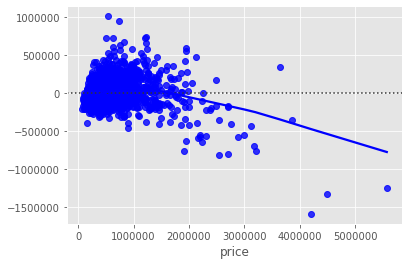

In [151]:
#risidual plot of liniar regression
sns.residplot(y_test, y_hat_test, lowess=True, color='b')

## Preparing the model for the holdout

Now that I've finished my modelI need to pickle it and have it make predictions on the hold out set.

In [152]:
#create final model for pickling
target = ols_1[['price']]
x = ols_1.drop(['price'],axis=1)


lm_final = LinearRegression()
lm_final = lm_final.fit(x,target)

In [153]:
import pickle
pickle_out = open('model.pickle','wb')
pickle.dump(lm_final,pickle_out)
pickle_out.close()

In [154]:
pickle_out = open('scaler.pickle','wb')
pickle.dump(scaler, pickle_out)
pickle_out.close()